In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head(10)

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119

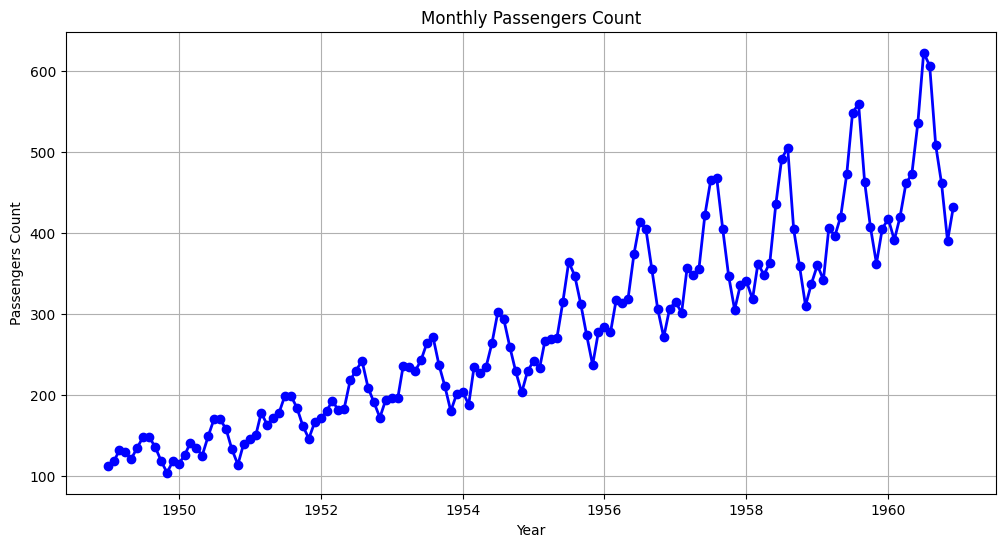

In [3]:
# Creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.title('Monthly Passengers Count')
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.grid(True)
plt.show()

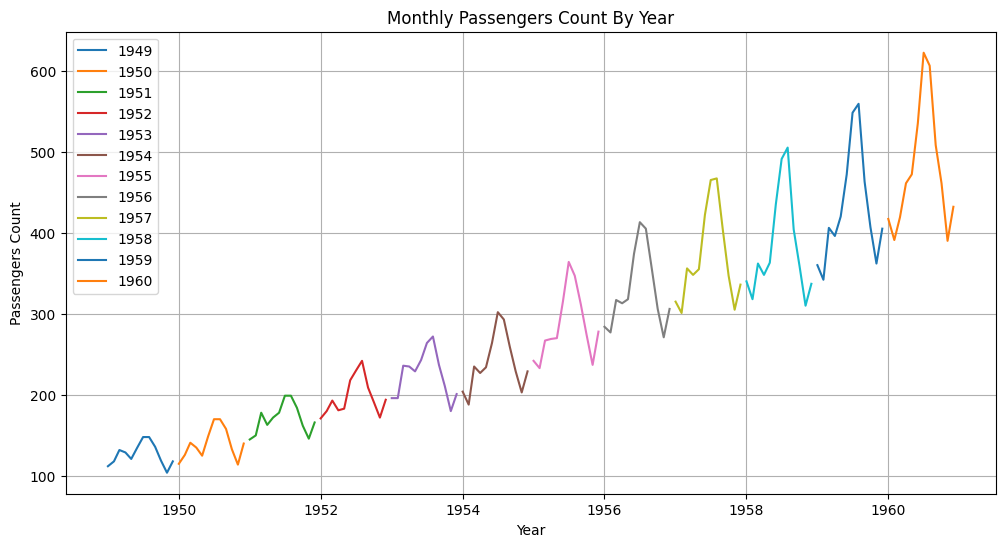

In [4]:
# Extract years from data
years = df.index.year.unique()

# Plotting each year as its own line
plt.figure(figsize=(12,6))
for year in years:
  year_data = df[df.index.year == year]
  plt.plot(year_data['Passengers'], label=year)

plt.title('Monthly Passengers Count By Year')
plt.xlabel('Year')
plt.ylabel('Passengers Count')
plt.legend()
plt.grid(True)
plt.show()

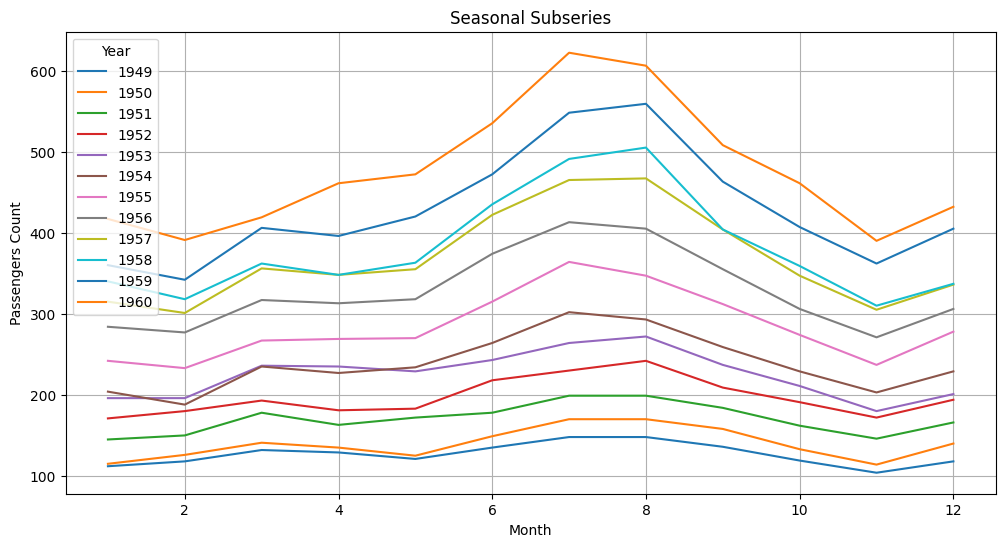

In [5]:
# Plot seasonal subseries
df['Year'] = df.index.year
df['month'] = df.index.month

# Pivot table
table = pd.pivot_table(df,
                       values='Passengers',
                       index=['month'],
                       columns='Year',
                       aggfunc='sum')

# Plot the series
fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Passengers Count')
ax.set_title('Seasonal Subseries')
plt.grid(True)
plt.show()

/tmp/ipython-input-2348247343.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Passengers'], shade=True)


Text(0, 0.5, 'Density')

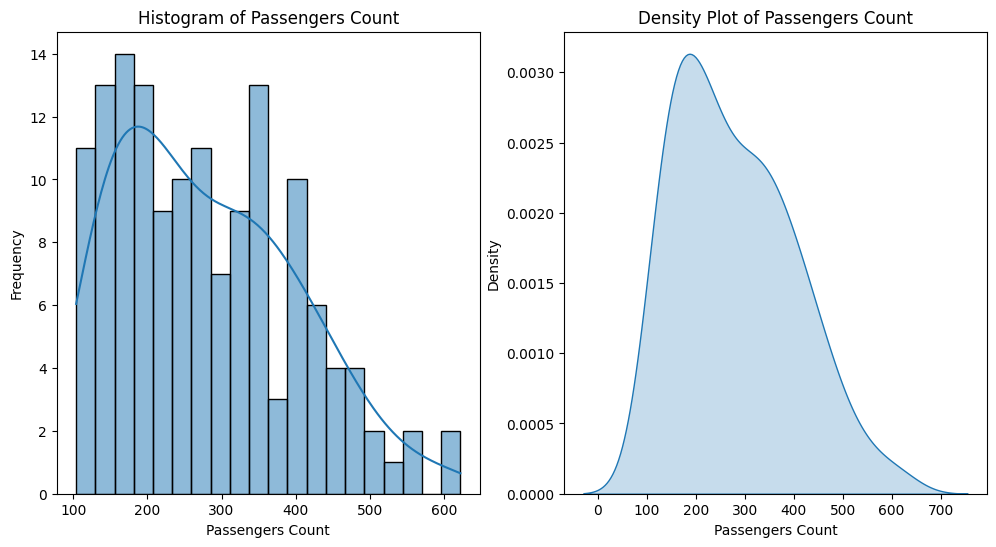

In [6]:
import seaborn as sns

# Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Passengers'], bins=20, kde=True)
plt.title('Histogram of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Frequency')

# Densidad
plt.subplot(1, 2, 2)
sns.kdeplot(df['Passengers'], shade=True)
plt.title('Density Plot of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Density')

Exercise 1.

Use the Sunspots dataset (https://www.kaggle.com/datasets/robervalt/sunspots) to demonstrate basic concepts of time series

In [7]:
df_sun = pd.read_csv('/content/Sunspots.csv', parse_dates=['Date'], index_col='Date')
df_sun.head()


Unnamed: 0  Monthly Mean Total Sunspot Number
Date                                                     
1749-01-31           0                               96.7
1749-02-28           1                              104.3
1749-03-31           2                              116.7
1749-04-30           3                               92.8
1749-05-31           4                              141.7

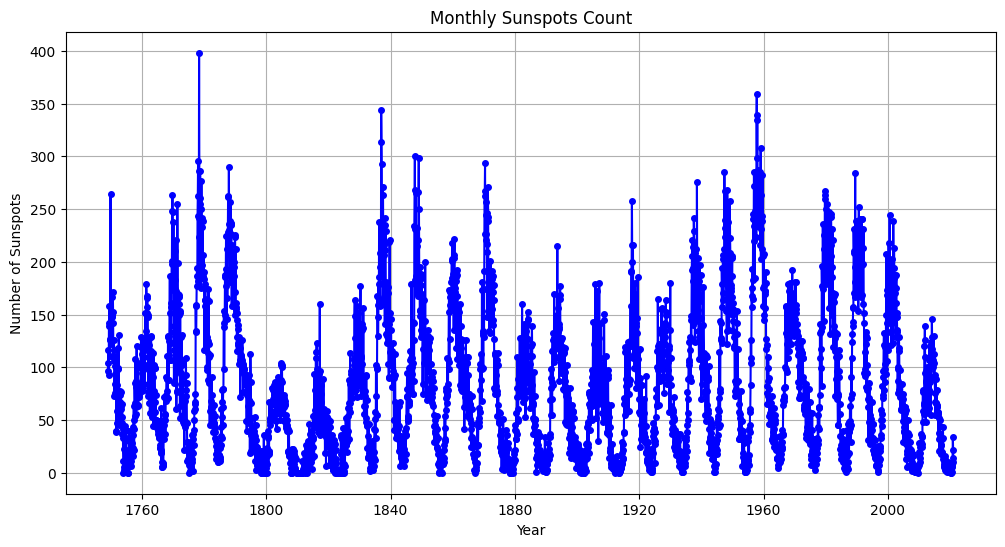

In [20]:
# Line plot of Sunspots data

plt.figure(figsize=(12,6))
plt.plot(df_sun['Monthly Mean Total Sunspot Number'], color='blue', marker='o', linestyle='-', linewidth=1.5, markersize=4
)
plt.title('Monthly Sunspots Count')
plt.xlabel('Year')
plt.ylabel('Number of Sunspots')
plt.grid(True)
plt.show()

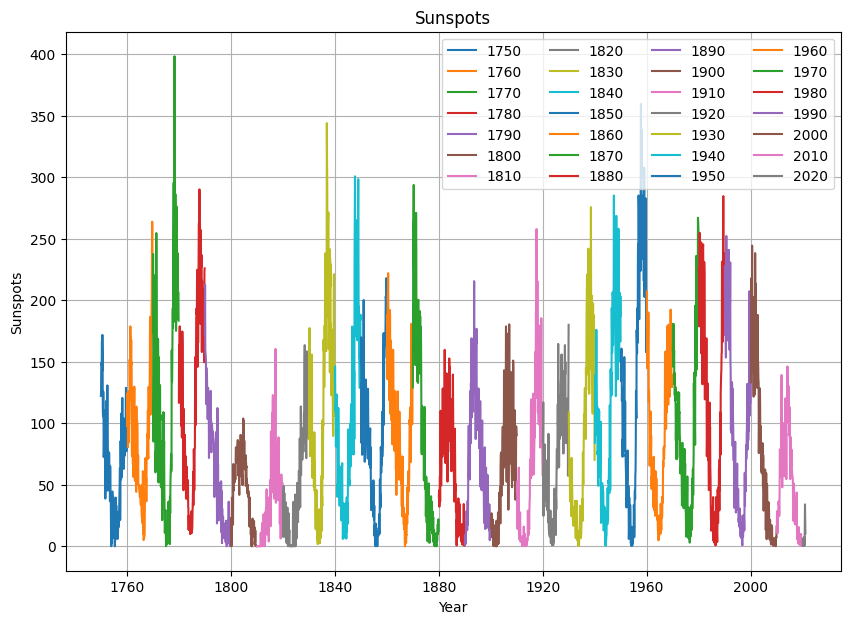

In [28]:

years = df_sun.index.year.unique()
decades = [y for y in years if y % 10 == 0]

plt.figure(figsize=(10,7))

for d in decades:
    decade_data = df_sun[df_sun.index.year // 10 * 10 == d]
    plt.plot(decade_data.index, decade_data['Monthly Mean Total Sunspot Number'], label=str(d))

plt.title("Sunspots")
plt.xlabel("Year")
plt.ylabel("Sunspots")
plt.legend(ncol=4)
plt.grid(True)
plt.show()

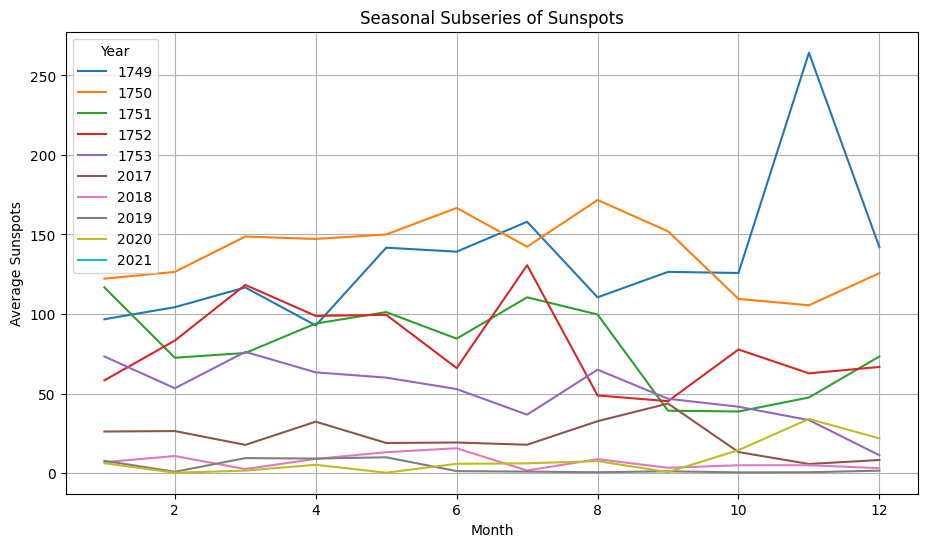

In [33]:
df_sun['Year'] = df_sun.index.year
df_sun['Month'] = df_sun.index.month
years_sorted = sorted(df_sun['Year'].unique())

first_5_years = years_sorted[:5]
last_5_years = years_sorted[-5:]
df_filtered = df_sun[df_sun['Year'].isin(first_5_years + last_5_years)]

table_filtered = pd.pivot_table(df_filtered, values='Monthly Mean Total Sunspot Number', index='Month',
columns='Year', aggfunc='mean')

fig, ax = plt.subplots(figsize=(11, 6))
table_filtered.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Average Sunspots')
ax.set_title('Seasonal Subseries of Sunspots')
plt.grid(True)
plt.show()

/tmp/ipython-input-1187279889.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_sun['Monthly Mean Total Sunspot Number'], shade=True)


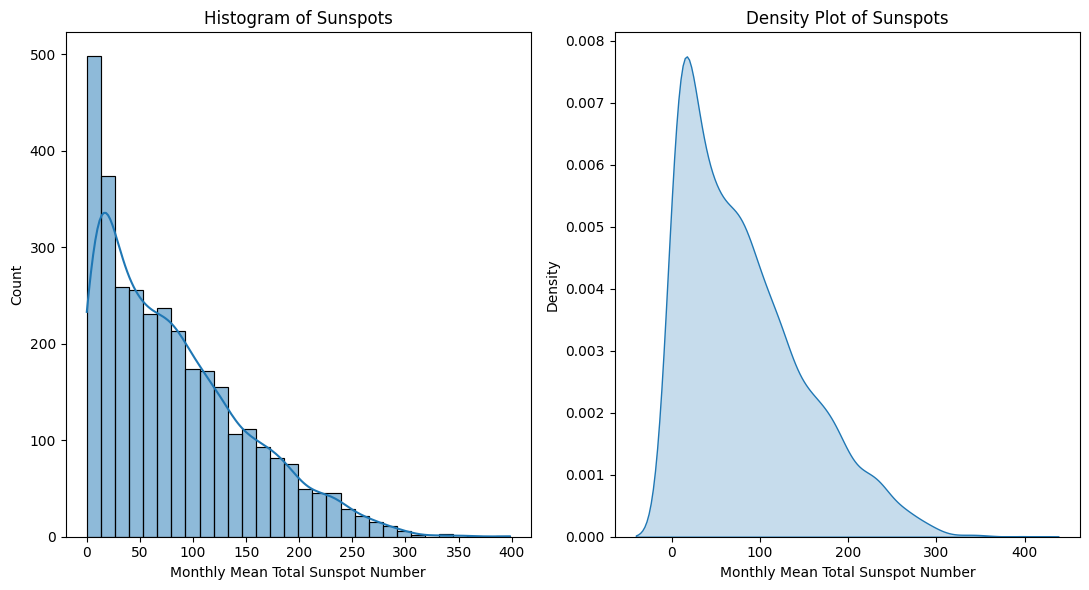

In [35]:
# Histogram & Density
plt.figure(figsize=(11,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df_sun['Monthly Mean Total Sunspot Number'], bins=30, kde=True)
plt.title('Histogram of Sunspots')

# Density
plt.subplot(1,2,2)
sns.kdeplot(df_sun['Monthly Mean Total Sunspot Number'], shade=True)
plt.title('Density Plot of Sunspots')
plt.tight_layout()
plt.show()

Exercise 2.

Use the Unemployment in America dataset(https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state)

In [37]:
df_unemp = pd.read_csv('/content/Unemployment_in_America_Per_US_State.csv')

df_unemp.head()

FIPS Code  State/Area  Year  Month  \
0          1     Alabama  1976      1   
1          2      Alaska  1976      1   
2          4     Arizona  1976      1   
3          5    Arkansas  1976      1   
4          6  California  1976      1   

  Total Civilian Non-Institutional Population in State/Area  \
0                                       2,605,000             
1                                         232,000             
2                                       1,621,000             
3                                       1,536,000             
4                                      15,621,000             

  Total Civilian Labor Force in State/Area  \
0                             1,484,555      
1                               160,183      
2                               964,120      
3                               889,044      
4                             9,774,280      

   Percent (%) of State/Area's Population Total Employment in State/Area  \
0                                    57.0                   1,386,023      
1                                    69.0                     148,820      
2                                    59.5                     865,871      
3                                    57.9                     824,395      
4                                    62.6                   8,875,685      

   Percent (%) of Labor Force Employed in State/Area  \
0                                               53.2   
1                                               64.1   
2                                               53.4   
3                                               53.7   
4                                               56.8   

  Total Unemployment in State/Area  \
0                        98,532      
1                        11,363      
2                        98,249      
3                        64,649      
4                       898,595      

   Percent (%) of Labor Force Unemployed in State/Area  
0                                                6.6    
1                                                7.1    
2                                               10.2    
3                                                7.3    
4                                                9.2

In [39]:
# Parse dates and prepare time series
df_unemp['Date'] = pd.to_datetime(df_unemp[['Year', 'Month']].assign(day=1))
df_unemp_ts = df_unemp.groupby('Date')['Percent (%) of Labor Force Unemployed in State/Area'].mean()

df_unemp_ts.head()

Date
1976-01-01    7.281132
1976-02-01    7.284906
1976-03-01    7.252830
1976-04-01    7.196226
1976-05-01    7.120755
Name: Percent (%) of Labor Force Unemployed in State/Area, dtype: float64

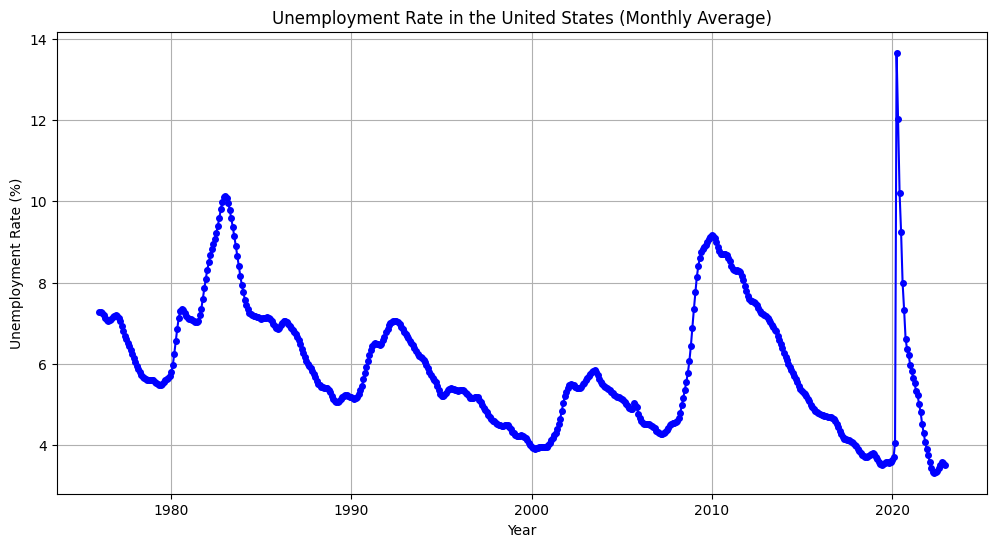

In [41]:
# Line plot

plt.figure(figsize=(12,6))
plt.plot(df_unemp_ts, color='blue', marker='o', linestyle='-', linewidth=1.5, markersize=4)

plt.title('Unemployment Rate in the United States (Monthly Average)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

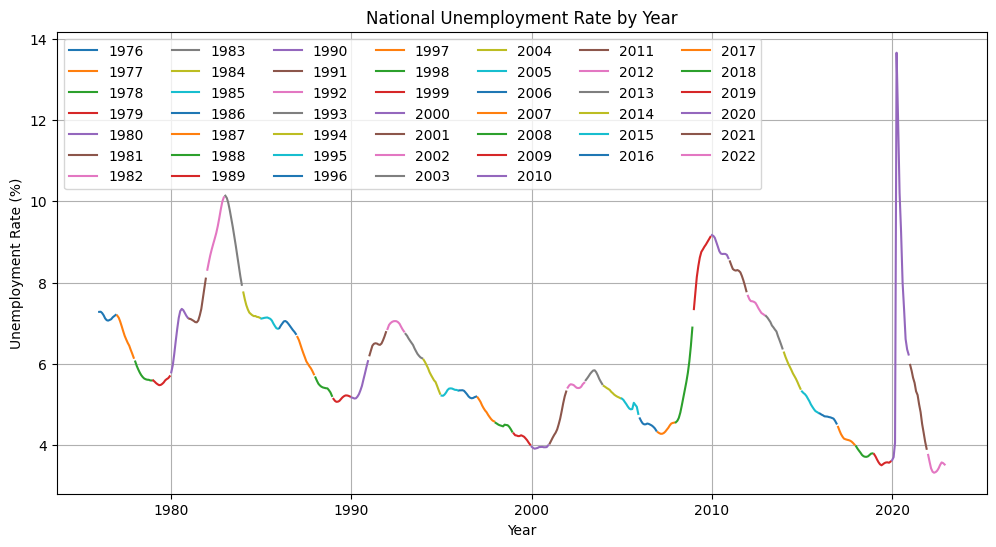

In [46]:
# Extract years from data
years = df_unemp_ts.index.year.unique()
plt.figure(figsize=(12,6))
for year in years:
    year_data = df_unemp_ts[df_unemp_ts.index.year == year]
    plt.plot(year_data, label=year)

plt.title('National Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.legend(ncol=7)
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

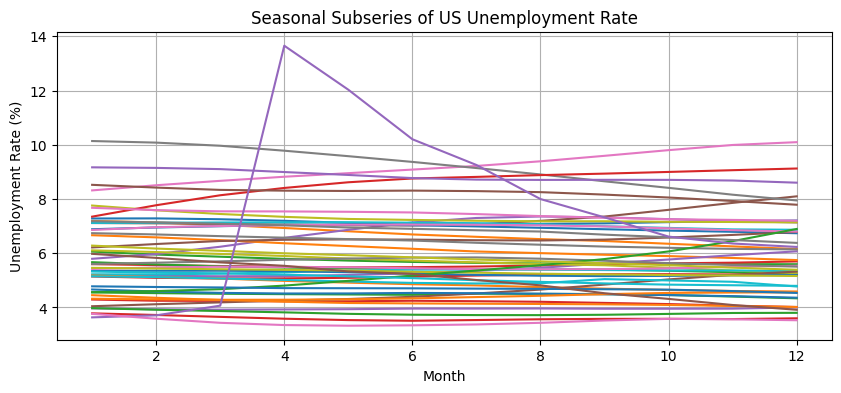

In [48]:
# Seasonal Subseries for Unemployment Rate

df_unemp_ts_df = df_unemp_ts.to_frame(name='UnempRate')
df_unemp_ts_df['Year'] = df_unemp_ts_df.index.year
df_unemp_ts_df['Month'] = df_unemp_ts_df.index.month

pivot_unemp = pd.pivot_table(df_unemp_ts_df, values='UnempRate', index='Month', columns='Year', aggfunc='mean')

plt.figure(figsize=(12,6))
pivot_unemp.plot(legend=False)
plt.title('Seasonal Subseries of US Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

/tmp/ipython-input-4035905004.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_unemp_ts_df['UnempRate'], shade=True)


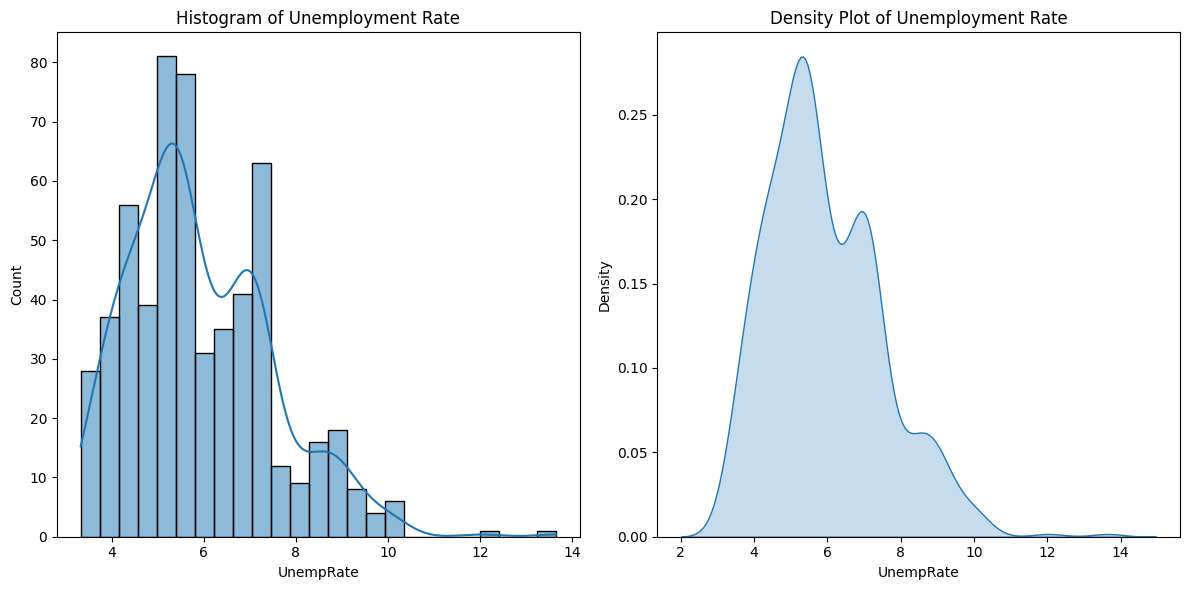

In [49]:
# Histogram & Density
plt.figure(figsize=(12,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df_unemp_ts_df['UnempRate'], bins=25, kde=True)
plt.title('Histogram of Unemployment Rate')

# Density
plt.subplot(1,2,2)
sns.kdeplot(df_unemp_ts_df['UnempRate'], shade=True)
plt.title('Density Plot of Unemployment Rate')

plt.tight_layout()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10,4)

In [10]:
def plot_series(s, title):
  s.plot()
  plt.title(title)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

def adf_test(x):
  res = adfuller(x, autolag="AIC")
  keys = ['test_stat', 'pvalue', 'lags', 'nobs', 'crit_values', 'icbest']
  return dict(zip(keys,[res[0], res[1], res[3], res[4], res[5]]))

def kpss_test(x, regression='c', nlags="auto"):
  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
  return {"test_stat": stat, "pvalue": pval, "lags": lags, "crit_values": crit, "regression": regression}

def print_test(x, name="series"):
  print(f"Test {name}")
  a = adf_test(x)
  print(f"ADF Statistic: {a['test_stat']:.3f} p={a['pvalue']}")
  try:
    k = kpss_test(x)
    print(f"KPSS: stat={k['test_stat']:.3f} p={k['pvalue']}")
  except:
    print("KPSS test failed")

def rolling_mean_var(s, window=24, title="Rolling Mean & Var"):
  rolling_mean = s.rolling(window).mean()
  rolling_var = s.rolling(window).var()
  fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  ax[0].plot(s, label="Original")
  ax[0].plot(rolling_mean, label="Rolling Mean")
  ax[0].legend()
  ax[0].set_title(title + "- mean")
  ax[1].plot(rolling_var, label="Rolling Var")
  ax[1].legend()
  ax[1].set_title(title + "- var")
  plt.show()


In [11]:
n = 240  # months
t =  np.arange(n)

# Stationary: white noise
white_noise = pd.Series(np.random.normal(0, 1, n))

trend = 0.02 * t
trended = pd.Series(trend + np.random.normal(0, 1, n))


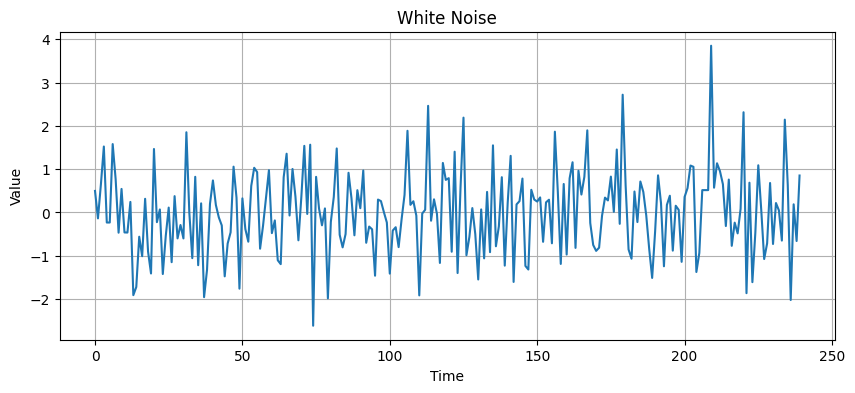

Test White Noise
ADF Statistic: -16.112 p=5.006520467194035e-29
KPSS: stat=0.298 p=0.1


/tmp/ipython-input-2085152180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


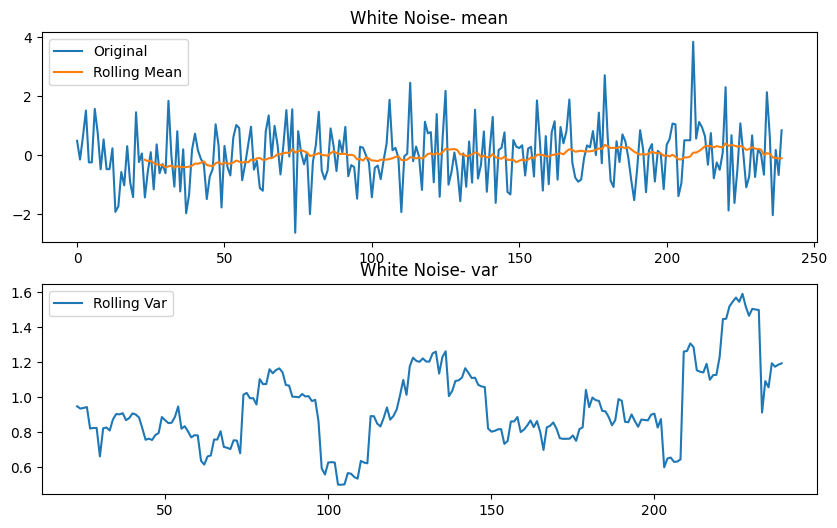

In [12]:
plot_series(white_noise, "White Noise")
print_test(white_noise, "White Noise")
rolling_mean_var(white_noise, window=24, title="White Noise")

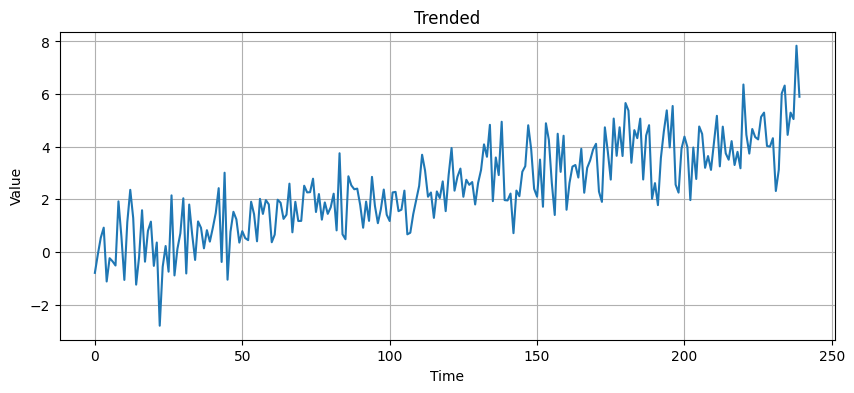

Test Trended
ADF Statistic: -0.057 p=0.9535945013089667
KPSS: stat=2.416 p=0.01


/tmp/ipython-input-2085152180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


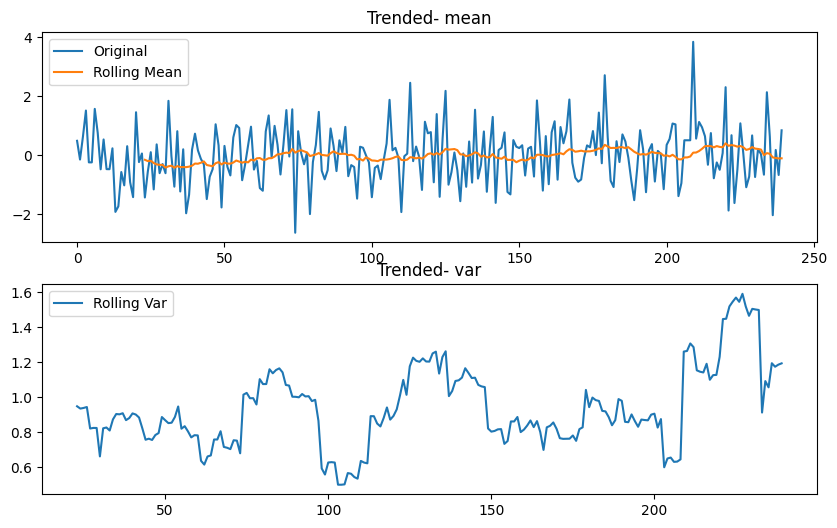

In [13]:
plot_series(trended, "Trended")
print_test(trended, "Trended")
rolling_mean_var(white_noise, window=24, title="Trended")

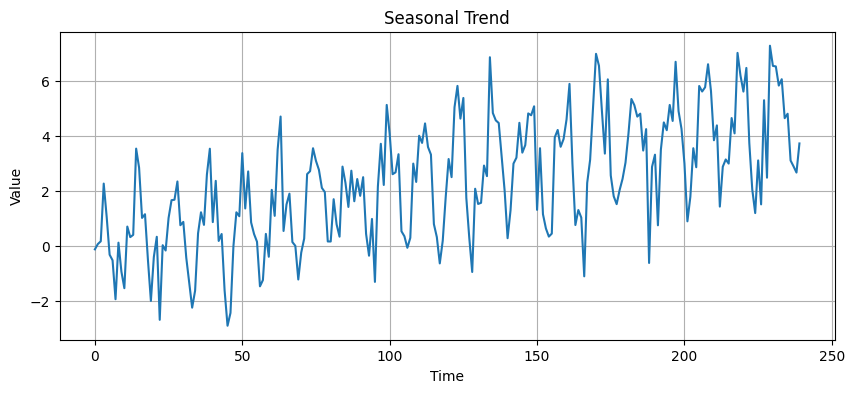

Test Seasonal Trend
ADF Statistic: -0.530 p=0.8860859361543622
KPSS: stat=2.407 p=0.01


/tmp/ipython-input-2085152180.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


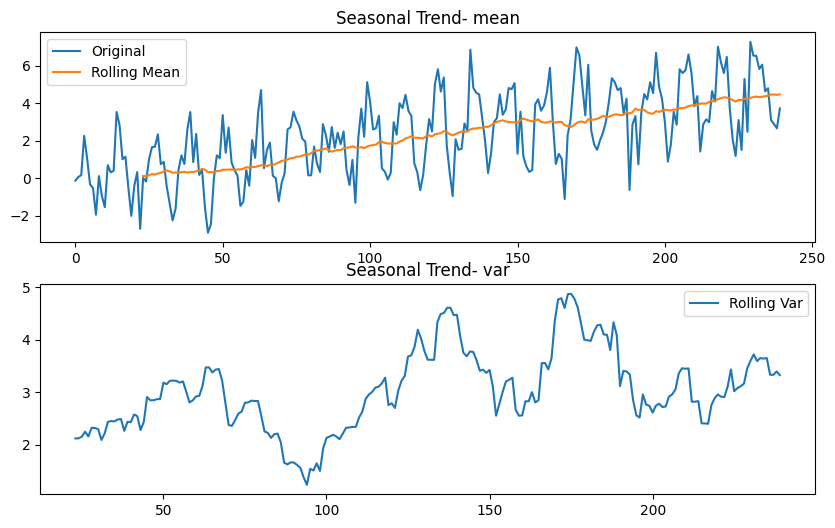

In [14]:
# Seasonal + trend
seasonal = 2 * np.sin(2*np.pi*t/12)
trend = 0.02 * t
season_trend = pd.Series(trend + seasonal + np.random.normal(0, 1, n))
plot_series(season_trend, "Seasonal Trend")
print_test(season_trend, "Seasonal Trend")
rolling_mean_var(season_trend, window=24, title="Seasonal Trend")

In [15]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
df.rename(columns={'Passengers':'y'}, inplace=True)
df.head()

y  Year  month
Month                       
1949-01-01  112  1949      1
1949-02-01  118  1949      2
1949-03-01  132  1949      3
1949-04-01  129  1949      4
1949-05-01  121  1949      5

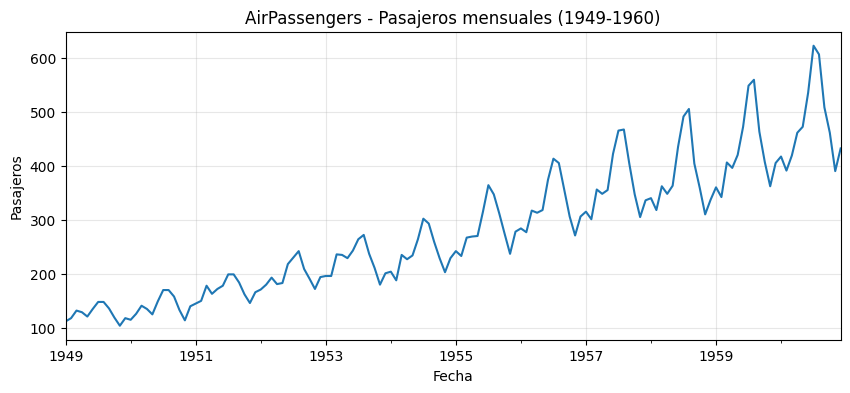

In [17]:
ax = df['y'].plot()
ax.set_title("AirPassengers - Pasajeros mensuales (1949-1960)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Pasajeros")
ax.grid(True, alpha=0.3)
plt.show()

In [18]:
from  statsmodels.tsa.seasonal import seasonal_decompose

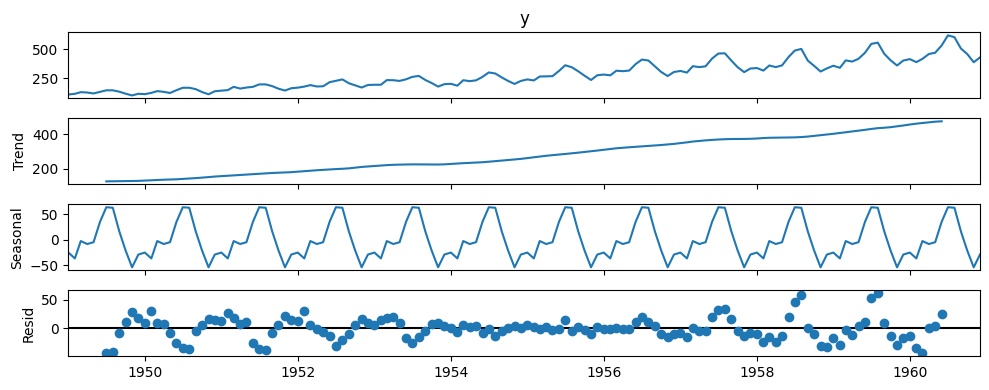

In [19]:
decomp = seasonal_decompose(df['y'], model= "additive", period=12)
decomp.plot()
plt.show()

In [50]:
from statsmodels.tsa.ar_model import AutoReg

In [51]:
# Fit an AR(1) model
model = AutoReg(df['y'], lags=1)
model_fit  =model.fit()

# Print the model summary
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  144
Model:                     AutoReg(1)   Log Likelihood                -704.106
Method:               Conditional MLE   S.D. of innovations             33.277
Date:                Mon, 24 Nov 2025   AIC                           1414.212
Time:                        07:12:36   BIC                           1423.100
Sample:                    02-01-1949   HQIC                          1417.823
                         - 12-01-1960                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7055      7.084      1.935      0.053      -0.178      27.589
y.L1           0.9589      0.023     41.106      0.000       0.913       1.005
                                    Roots           

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

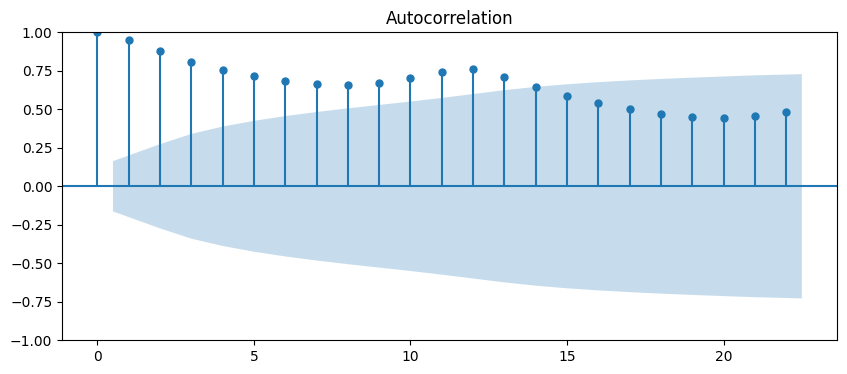

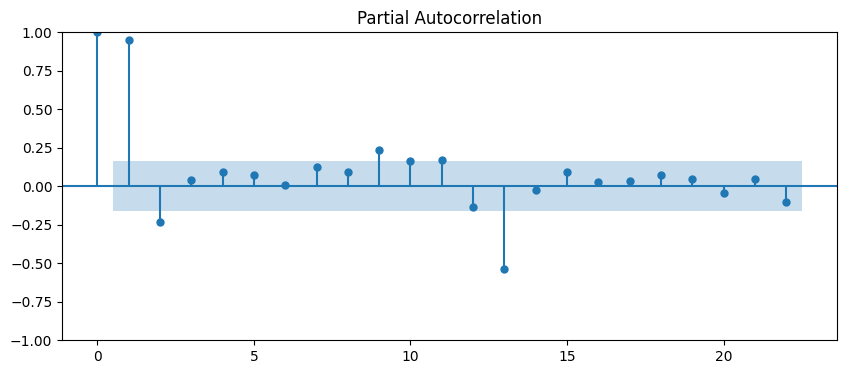

In [53]:
# Plot ACF and PACF
plot_acf(df['y'])
plt.show()
plot_pacf(df['y'])
plt.show()